In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib_venn import venn2
import plotly.express as px
import os


In [2]:
# Create output directory for saved visualizations if it doesn't exist
output_dir = r'C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data'
os.makedirs(output_dir, exist_ok=True)
print(f"Output directory created/verified: {output_dir}")

Output directory created/verified: C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data


In [3]:
compstak_df = pd.read_csv(r'C:\Users\clint\Desktop\compstak-analysis\Data\compstak_mapped.csv')
doe_df = pd.read_csv(r'C:\Users\clint\Desktop\compstak-analysis\Data\DOE_mapped.csv')

In [4]:
# Rename 'State' column to 'statecode' in compstak_df for consistent analysis
compstak_df = compstak_df.rename(columns={'State': 'statecode'})

# Verify column names in both dataframes
print("ComptStak DF columns:", compstak_df.columns.tolist())
print("DOE DF columns:", doe_df.columns.tolist())

ComptStak DF columns: ['Property Type', 'Property Subtype', 'Property Id', 'statecode', 'DOE_Compliant_Property_Type']
DOE DF columns: ['statecode', 'reported_propertytype', 'reported_propertysubtype', 'compstak_equivalent_category']


In [5]:
compstak_df

,Property Type,Property Subtype,Property Id,statecode,DOE_Compliant_Property_Type
0,Retail,Parking,1,NY,Other
1,Retail,Apartments,2,NY,Multi-Family
2,Office,NaN,3,NY,Office
3,Retail,NaN,4,NY,Retail
4,Office,Mixed-Use,5,NY,Other
...,...,...,...,...,...
759618,NaN,NaN,3611385,NY,Other
759619,Industrial,Flex/R&D,3611389,FL,Industrial
759620,Industrial,Flex/R&D,3611390,FL,Industrial
759621,NaN,NaN,3611391,CA,Other


In [6]:
doe_df

,statecode,reported_propertytype,reported_propertysubtype,compstak_equivalent_category
0,CT,Flex,Light Manufacturing,Industrial
1,CT,Industrial,Warehouse,Industrial
2,CT,Industrial,NaN,Industrial
3,CT,Multi-Family,Apartments,Multi-Family
4,CT,Multi-Family,Apartments,Multi-Family
...,...,...,...,...
2246480,WI,Retail,Storefront Retail/Office,Retail
2246481,WI,Retail,Storefront Retail/Office,Retail
2246482,WI,Retail,NaN,Retail
2246483,WI,Retail,NaN,Retail


# State Coverage Analysis

Let's analyze the coverage of CompStak data with respect to DOE data based on state codes.

In [7]:
# Get unique state codes from both datasets
compstak_states = set(compstak_df['statecode'].unique())
doe_states = set(doe_df['statecode'].unique())

# Calculate overlap
states_in_both = compstak_states.intersection(doe_states)
states_only_in_doe = doe_states - compstak_states
states_only_in_compstak = compstak_states - doe_states

print(f"Total unique states in CompStak: {len(compstak_states)}")
print(f"Total unique states in DOE: {len(doe_states)}")
print(f"States in both datasets: {len(states_in_both)}")
print(f"States only in DOE: {len(states_only_in_doe)}")
print(f"States only in CompStak: {len(states_only_in_compstak)}")

# Calculate coverage percentage
coverage_pct = (len(states_in_both) / len(doe_states)) * 100
print(f"State code coverage: {coverage_pct:.2f}%")

Total unique states in CompStak: 51
Total unique states in DOE: 51
States in both datasets: 51
States only in DOE: 0
States only in CompStak: 0
State code coverage: 100.00%


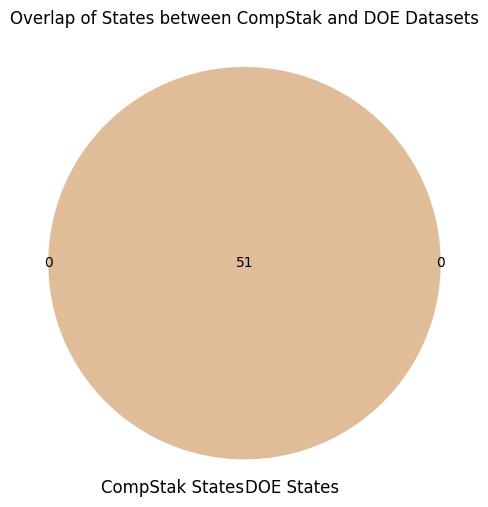

In [8]:
# Create Venn diagram to visualize state code overlap
plt.figure(figsize=(10, 6))
venn2([compstak_states, doe_states], ('CompStak States', 'DOE States'))
plt.title('Overlap of States between CompStak and DOE Datasets')
plt.show()

In [9]:
# Save the Venn diagram to the output directory
plt.figure(figsize=(10, 6))
venn2([compstak_states, doe_states], ('CompStak States', 'DOE States'))
plt.title('Overlap of States between CompStak and DOE Datasets')
venn_output_path = os.path.join(output_dir, 'state_overlap_venn.png')
plt.savefig(venn_output_path, dpi=300, bbox_inches='tight')
plt.close()
print(f"Saved Venn diagram to: {venn_output_path}")

Saved Venn diagram to: C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data\state_overlap_venn.png


In [10]:
# Record count analysis by state
# Group by state and count records
compstak_state_counts = compstak_df.groupby('statecode').size().reset_index(name='compstak_count')
doe_state_counts = doe_df.groupby('statecode').size().reset_index(name='doe_count')

# Merge the counts
state_comparison = pd.merge(doe_state_counts, compstak_state_counts, on='statecode', how='outer').fillna(0)

# Calculate coverage ratio
state_comparison['coverage_ratio'] = state_comparison['compstak_count'] / state_comparison['doe_count']
state_comparison['coverage_ratio'] = state_comparison['coverage_ratio'].fillna(0)
state_comparison['coverage_pct'] = state_comparison['coverage_ratio'] * 100

# Sort by DOE count descending
state_comparison = state_comparison.sort_values('doe_count', ascending=False)

state_comparison.head(10)

,statecode,doe_count,compstak_count,coverage_ratio,coverage_pct
4,CA,238844,162162,0.678945,67.894525
43,TX,157912,64220,0.406682,40.668220
9,FL,145821,54836,0.376050,37.605009
34,NY,113724,43118,0.379146,37.914600
35,OH,109843,19159,0.174422,17.442167
38,PA,90276,21876,0.242324,24.232354
14,IL,83364,31389,0.376529,37.652944
27,NC,79107,27085,0.342384,34.238437
22,MI,76260,15952,0.209179,20.917912
10,GA,74036,25218,0.340618,34.061808


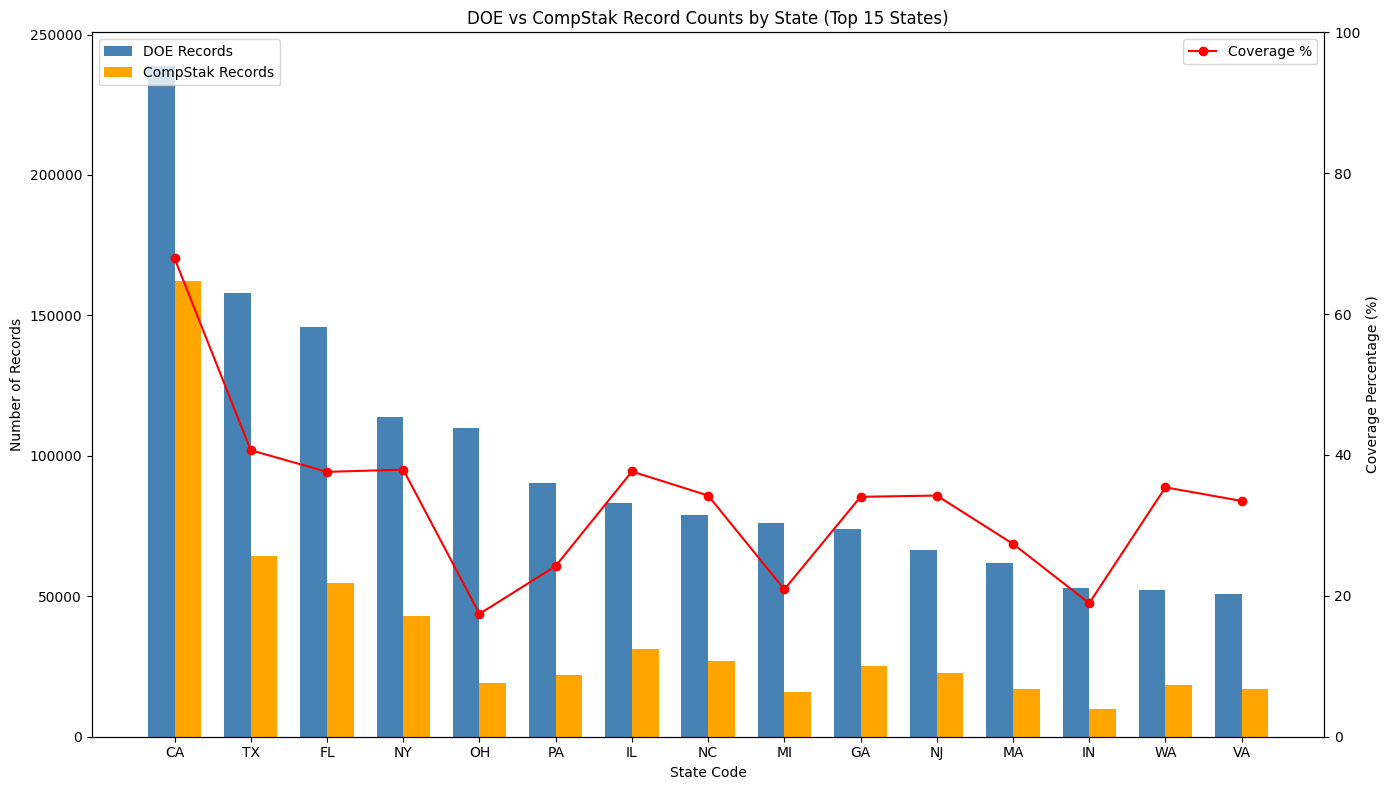

In [11]:
# Visualize top 15 states by DOE count with coverage
top_states = state_comparison.head(15).copy()

fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot bars for DOE and CompStak counts
x = np.arange(len(top_states))
width = 0.35

ax1.bar(x - width/2, top_states['doe_count'], width, label='DOE Records', color='steelblue')
ax1.bar(x + width/2, top_states['compstak_count'], width, label='CompStak Records', color='orange')
ax1.set_xlabel('State Code')
ax1.set_ylabel('Number of Records')
ax1.set_title('DOE vs CompStak Record Counts by State (Top 15 States)')
ax1.set_xticks(x)
ax1.set_xticklabels(top_states['statecode'])
ax1.legend(loc='upper left')

# Add coverage percentage as a line on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(x, top_states['coverage_pct'], 'r-', marker='o', label='Coverage %')
ax2.set_ylabel('Coverage Percentage (%)')
ax2.set_ylim(0, 100)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [12]:
# Save the bar chart with coverage line to the output directory
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot bars for DOE and CompStak counts
x = np.arange(len(top_states))
width = 0.35

ax1.bar(x - width/2, top_states['doe_count'], width, label='DOE Records', color='steelblue')
ax1.bar(x + width/2, top_states['compstak_count'], width, label='CompStak Records', color='orange')
ax1.set_xlabel('State Code')
ax1.set_ylabel('Number of Records')
ax1.set_title('DOE vs CompStak Record Counts by State (Top 15 States)')
ax1.set_xticks(x)
ax1.set_xticklabels(top_states['statecode'])
ax1.legend(loc='upper left')

# Add coverage percentage as a line on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(x, top_states['coverage_pct'], 'r-', marker='o', label='Coverage %')
ax2.set_ylabel('Coverage Percentage (%)')
ax2.set_ylim(0, 100)
ax2.legend(loc='upper right')

plt.tight_layout()
barchart_output_path = os.path.join(output_dir, 'top15_states_coverage.png')
plt.savefig(barchart_output_path, dpi=300, bbox_inches='tight')
plt.close()
print(f"Saved bar chart to: {barchart_output_path}")

Saved bar chart to: C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data\top15_states_coverage.png


In [13]:
# Create a map visualization of coverage by state
# First, add state names to our data for mapping
# This assumes statecode is the standard 2-letter state abbreviation

# Define state code to state name mapping
state_mapping = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',
    'DC': 'District of Columbia'
}

# Add state names to the comparison dataframe
state_comparison['state'] = state_comparison['statecode'].map(state_mapping)

# Create choropleth map
fig = px.choropleth(state_comparison,
                    locations='statecode',
                    locationmode='USA-states',
                    color='coverage_pct',
                    hover_name='state',
                    scope='usa',
                    color_continuous_scale='YlOrRd',
                    labels={'coverage_pct': 'Coverage %'},
                    hover_data=['doe_count', 'compstak_count', 'coverage_pct'],
                    title='CompStak Coverage of DOE Data by State (%)')

fig.update_layout(coloraxis_colorbar=dict(title='Coverage %'))
fig.show()

In [14]:
# Save the choropleth map to the output directory
# For plotly figures, we need to install the kaleido package for static image export
# !pip install -q kaleido

choropleth_output_path = os.path.join(output_dir, 'state_coverage_map.png')
fig.write_image(choropleth_output_path, width=1200, height=800)
print(f"Saved choropleth map to: {choropleth_output_path}")

# Also save as interactive HTML
html_output_path = os.path.join(output_dir, 'state_coverage_map.html')
fig.write_html(html_output_path)
print(f"Saved interactive HTML map to: {html_output_path}")

Saved choropleth map to: C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data\state_coverage_map.png
Saved interactive HTML map to: C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data\state_coverage_map.html


In [15]:
# Calculate overall coverage metrics
total_doe_records = doe_df.shape[0]
total_compstak_records = compstak_df.shape[0]
overall_coverage_ratio = total_compstak_records / total_doe_records * 100

print(f"Total DOE records: {total_doe_records:,}")
print(f"Total CompStak records: {total_compstak_records:,}")
print(f"Overall record coverage: {overall_coverage_ratio:.2f}%")

# Let's check coverage for states that are in both datasets
doe_in_common = doe_df[doe_df['statecode'].isin(states_in_both)]
compstak_in_common = compstak_df[compstak_df['statecode'].isin(states_in_both)]

common_doe_records = doe_in_common.shape[0]
common_compstak_records = compstak_in_common.shape[0]
common_coverage_ratio = common_compstak_records / common_doe_records * 100 if common_doe_records > 0 else 0

print(f"\nDOE records in common states: {common_doe_records:,}")
print(f"CompStak records in common states: {common_compstak_records:,}")
print(f"Coverage for common states: {common_coverage_ratio:.2f}%")

Total DOE records: 2,246,485
Total CompStak records: 759,623
Overall record coverage: 33.81%

DOE records in common states: 2,246,485
CompStak records in common states: 759,623
Coverage for common states: 33.81%


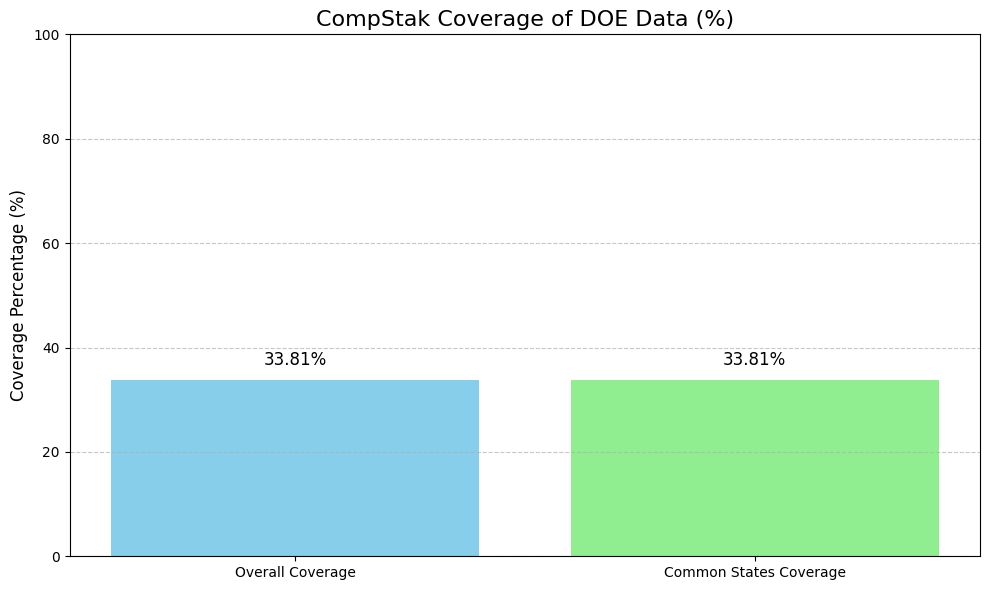

Saved coverage summary chart to: C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data\coverage_summary.png


In [16]:
# Create a summary visualization showing coverage metrics
metrics = ['Overall Coverage', 'Common States Coverage']
values = [overall_coverage_ratio, common_coverage_ratio]

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['skyblue', 'lightgreen'])
plt.title('CompStak Coverage of DOE Data (%)', fontsize=16)
plt.ylabel('Coverage Percentage (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{height:.2f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
summary_output_path = os.path.join(output_dir, 'coverage_summary.png')
plt.savefig(summary_output_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"Saved coverage summary chart to: {summary_output_path}")

## Saved Visualizations Summary

All visualizations have been saved to: `C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data`

The following files were created:

1. `state_overlap_venn.png` - Venn diagram showing state code overlap
2. `top15_states_coverage.png` - Bar chart with line showing DOE vs CompStak record counts for top 15 states
3. `state_coverage_map.png` - Choropleth map showing coverage by state (static image)
4. `state_coverage_map.html` - Interactive HTML version of the choropleth map
5. `coverage_summary.png` - Summary chart of overall coverage metrics